# Diviseur résistif

Un diviseur résistif divise une source de tension $U(t)= A \sin(\omega t)$ avec 2 résistances R1 et R2 en série. On mesure la sortie sur R2.

*cf exercice 3.2 du cours*

In [2]:
import sympy as sp
t,A,w, R1, R2=sp.symbols('t,A,w, R1, R2')
U=sp.Lambda(t,A*sp.sin(w*t)*R2/(R1+R2))

In [4]:
U

Lambda(t, A*R2*sin(t*w)/(R1 + R2))

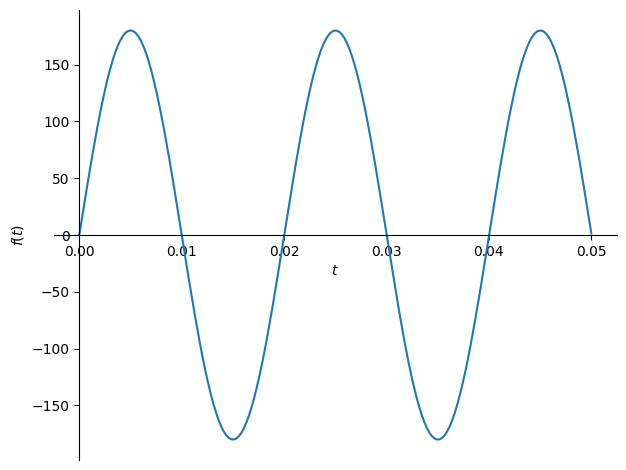

In [6]:
vR1=1000; vR2=3000; vA=240; vW=314
values={R1:1000, R2:3000, A:240, w:314}
vU=U(t).subs(values)
sp.plotting.plot(vU,(t,0,0.05), adaptive=False, nb_of_points=200)

Valeur maximale de la sortie pour
- $R1=1000 +/- 20 [\Omega]$
- $R2=3000 +/- 40 [\Omega]$
- $A=240 +/-15 [V]$
- $\omega=314 +/-2 [rad/s]$

In [10]:
tmax=sp.pi/2/w.subs(values)
U(t).diff(R1).subs(values).subs(t,tmax)

-9/200

In [11]:
U(t).diff(R2).subs(values).subs(t,tmax)

3/200

In [7]:
U(t).diff(A).subs(values).subs(t,tmax)

3/4

On en déduit que la valeur de sortie
- Augmente pour R2 et A augmentent
- Diminue pour R1 augmente

La valeur maximum sera obtenue pour des valeur R2 et A additionnés de leur erreur et une valeur de R1 diminuée de l'erreur. C'est l'inverse pour la valeur minimum.

$\omega$ n'a pas d'influence sur l'amplitude pour cette erreur n'affecte que la fréquence.

### Q2 a) Calcul exact de l'erreur

In [23]:
valuesMax={R1:1000-20, R2:3000+40, A:240+15, w:314}
valuesMin={R1:1000+20, R2:3000-40, A:240-15, w:314}
valuesAbsMax={R1:1000+20, R2:3000+40, A:240+15, w:314}

In [9]:
Umax=U(tmax).subs(valuesMax).evalf()
Umax

192.835820895522

In [10]:
Umin=U(tmax).subs(valuesMin).evalf()
Umin

167.336683417085

In [11]:
DU=Umax-Umin
DU

25.4991374784369

### Q2 b) Linéarisation et valeur max

On linéarise la valeur max pour les 3 variables R1,R2 et A

On ne tient pas compte de la fonction sin.

In [12]:
U0=U(tmax).subs(values)
SA=U(tmax).diff(A).subs(values)
SR1=U(tmax).diff(R1).subs(values)
SR2=U(tmax).diff(R2).subs(values)

Ucrete_lin=U0 + SA*(A-vA)+ SR1*(R1-vR1)+ SR2*(R2-vR2)
Ucrete_lin

3*A/4 - 9*R1/200 + 3*R2/200

La valeur maximum pour Ucrete sera atteint pour les mêmes conditions que pour le calcul exact

In [13]:
UlinMax=Ucrete_lin.subs(valuesMax).evalf()
UlinMax

192.750000000000

In [14]:
UlinMin=Ucrete_lin.subs(valuesMin).evalf()
UlinMin

167.250000000000

In [15]:
UlinMax-UlinMin

25.5000000000000

In [21]:
Ucrete_lin=U0 + sp.Abs(SA*(A-vA))+ sp.Abs(SR1*(R1-vR1))+ sp.Abs(SR2*(R2-vR2))
Ucrete_lin

Abs(3*A/4 - 180) + Abs(9*R1/200 - 45) + Abs(3*R2/200 - 45) + 180

In [25]:
Ucrete_lin.subs(valuesAbsMax).evalf()

192.750000000000

### Q2 c) Calcul d'erreur avec les règles + - * /

On a des produits, donc on utilise des valeurs relatives.

In [5]:
eR1R2 = (20+40)/(vR1+vR2); eR2 = 40/vR2; eA = 15 / vA
erMax =eR1R2 + eR2 + eA
erMax * vA * vR2 / (vR1+vR2)

16.35

In [6]:
vA * vR2 / (vR1+vR2) *(1+ erMax)


196.35